## Text Analytics Assignment 2

## Choice 1: Building a Crowdsourced Recommendation System

## Group Members:
- Mohammed Saqib Asghar
- Truett Bloxsom
- Dandi Chen
- Yuke Liu
- Ming-Hsiu (Matthew), Peng


# PartA

In [ ]:
#Importing packages
# from selenium import webdriver
# import pandas as pd

# def clean_review(s):
#     string = s.splitlines()
#     string = list(filter(None, string))
#     del string[0:2]
#     del string[-2:]
#     return string

# #change directory where you put your chrome driver
# driver = webdriver.Chrome('/Users/tsblo/MSBA Fall/Text Analytics/selenium/chromedriver_win32/chromedriver.exe')
# driver.get('https://www.beeradvocate.com/beer/top-rated/')

# # create beer list for web scraper
# beer_list = []

# x = 2
# while x < 252:
#     beer = driver.find_elements_by_xpath("//*[@id='ba-content']/table/tbody/tr[{}]/td[2]/a/b".format(x))[0].text
#     beer_list.append(beer)
#     x += 1

# all_comments = pd.DataFrame(columns = ['Product_name','product_review', 'user_ratings', "overall_rating"]) 

# page = 0

# for beer in beer_list:
#     print(page)
    
#     driver.find_element_by_link_text("{}".format(beer)).click()
#     driver.implicitly_wait(1)
     
#     ids = driver.find_elements_by_xpath("//*[@id='rating_fullview_content_2']/div/span/a[1]")
    
#     rating = 0
    
#     # not all beers have 25 reviews
#     while rating <= (len(ids) - 1):

#         product = beer
        
#         # this gets the whole review with ratings and date, cant seem to figure out how to just get review
#         review = driver.find_elements_by_xpath("//*[@id='rating_fullview_content_2']")[rating].text
        
#         # this gets all of the ratings, dont exactly know which rating he wants 
#         user_ratings = driver.find_elements_by_xpath("//*[@id='rating_fullview_content_2']/span[4]")[rating].text
        
#         # this gets the big overall rating, im guessing this is what rating he wants us to use
#         overall_rating = driver.find_elements_by_xpath("//*[@id='rating_fullview_content_2']/span[1]")[rating].text

#         all_comments.loc[len(all_comments)] = [product,review,user_ratings,overall_rating]

#         rating += 1
    
#     page += 1
#     driver.execute_script("window.history.go(-1)")
#     driver.implicitly_wait(3)

# all_comments["clean_review"] = all_comments["product_review"].map(clean_review)
# all_comments.to_csv("6039 beer reviews of 250 beers.csv", sep="\t")

# TaskB

In [1]:
import pandas as pd
from string import punctuation

beerdf = pd.read_csv("6039 beer reviews of 250 beers.csv", sep="\t")
beerdf = beerdf.drop(columns = ["product_review","user_ratings","Unnamed: 0"],axis=1)
beerdf[:10]

,Product_name,overall_rating,clean_review
0,Kentucky Brunch Brand Stout,4.80,"['2016 Silver Wax. Aroma has whiskey, maple, t..."
1,Kentucky Brunch Brand Stout,4.74,['The beer pours Pitch Black with a frothy tan...
2,Kentucky Brunch Brand Stout,4.68,"[""Probably the smoothest beer I have ever had...."
3,Kentucky Brunch Brand Stout,5.00,"['Dark black, very thick, a little bit of tan ..."
4,Kentucky Brunch Brand Stout,4.97,['Poured black as ink with thin ruby edges at ...
5,Kentucky Brunch Brand Stout,4.75,['she’s got heat....but man is she somethin ni...
6,Kentucky Brunch Brand Stout,5.00,['Amazing brew. The maple aroma pours out of t...
7,Kentucky Brunch Brand Stout,4.30,"[""Finally got to try the white whale. Pours li..."
8,Kentucky Brunch Brand Stout,4.85,['Had this on tap at the 12-15-18 release in D...
9,Kentucky Brunch Brand Stout,4.89,['Had this on tap At the KBBS release 12/15/18...


In [2]:
#remove punctuation
from string import punctuation
def removepunctuation(text):
    for itr in punctuation:
        text = text.replace(itr,'')
    return text.lower()

beerdf['new_clean review'] = beerdf['clean_review'].apply(removepunctuation)
beerdf[:10]

,Product_name,overall_rating,clean_review,new_clean review
0,Kentucky Brunch Brand Stout,4.80,"['2016 Silver Wax. Aroma has whiskey, maple, t...",2016 silver wax aroma has whiskey maple toffee...
1,Kentucky Brunch Brand Stout,4.74,['The beer pours Pitch Black with a frothy tan...,the beer pours pitch black with a frothy tan h...
2,Kentucky Brunch Brand Stout,4.68,"[""Probably the smoothest beer I have ever had....",probably the smoothest beer i have ever had sm...
3,Kentucky Brunch Brand Stout,5.00,"['Dark black, very thick, a little bit of tan ...",dark black very thick a little bit of tan head...
4,Kentucky Brunch Brand Stout,4.97,['Poured black as ink with thin ruby edges at ...,poured black as ink with thin ruby edges at 58...
5,Kentucky Brunch Brand Stout,4.75,['she’s got heat....but man is she somethin ni...,she’s got heatbut man is she somethin nice lot...
6,Kentucky Brunch Brand Stout,5.00,['Amazing brew. The maple aroma pours out of t...,amazing brew the maple aroma pours out of this...
7,Kentucky Brunch Brand Stout,4.30,"[""Finally got to try the white whale. Pours li...",finally got to try the white whale pours like ...
8,Kentucky Brunch Brand Stout,4.85,['Had this on tap at the 12-15-18 release in D...,had this on tap at the 121518 release in decor...
9,Kentucky Brunch Brand Stout,4.89,['Had this on tap At the KBBS release 12/15/18...,had this on tap at the kbbs release 121518 pou...


In [3]:
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords # Import the stop word list
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#divide sentence into words
beerdf['words']= beerdf['new_clean review'].apply(word_tokenize)
beerdf[:5]

,Product_name,overall_rating,clean_review,new_clean review,words
0,Kentucky Brunch Brand Stout,4.80,"['2016 Silver Wax. Aroma has whiskey, maple, t...",2016 silver wax aroma has whiskey maple toffee...,"[2016, silver, wax, aroma, has, whiskey, maple..."
1,Kentucky Brunch Brand Stout,4.74,['The beer pours Pitch Black with a frothy tan...,the beer pours pitch black with a frothy tan h...,"[the, beer, pours, pitch, black, with, a, frot..."
2,Kentucky Brunch Brand Stout,4.68,"[""Probably the smoothest beer I have ever had....",probably the smoothest beer i have ever had sm...,"[probably, the, smoothest, beer, i, have, ever..."
3,Kentucky Brunch Brand Stout,5.00,"['Dark black, very thick, a little bit of tan ...",dark black very thick a little bit of tan head...,"[dark, black, very, thick, a, little, bit, of,..."
4,Kentucky Brunch Brand Stout,4.97,['Poured black as ink with thin ruby edges at ...,poured black as ink with thin ruby edges at 58...,"[poured, black, as, ink, with, thin, ruby, edg..."


In [5]:
def remove_stopwords(list_words):
    """
    Filter out stopwords
    """
    return [w for w in list_words if not w in stop_words]

def duplicate_words(list_words):
    """
    remove_duplicate_words
    """
    return list(set(list_words))

beerdf['clean_words'] = beerdf['words'].apply(remove_stopwords)
beerdf['final_words'] = beerdf['clean_words'].apply(duplicate_words)
beerdf[:5]

,Product_name,overall_rating,clean_review,new_clean review,words,clean_words,final_words
0,Kentucky Brunch Brand Stout,4.80,"['2016 Silver Wax. Aroma has whiskey, maple, t...",2016 silver wax aroma has whiskey maple toffee...,"[2016, silver, wax, aroma, has, whiskey, maple...","[2016, silver, wax, aroma, whiskey, maple, tof...","[whiskey, barrel, wood, 2016, cacao, maple, si..."
1,Kentucky Brunch Brand Stout,4.74,['The beer pours Pitch Black with a frothy tan...,the beer pours pitch black with a frothy tan h...,"[the, beer, pours, pitch, black, with, a, frot...","[beer, pours, pitch, black, frothy, tan, head,...","[brûlée, beer, maple, black, feel, smooth, bot..."
2,Kentucky Brunch Brand Stout,4.68,"[""Probably the smoothest beer I have ever had....",probably the smoothest beer i have ever had sm...,"[probably, the, smoothest, beer, i, have, ever...","[probably, smoothest, beer, ever, smelled, bet...","[beer, didnt, maple, flavor, nose, discernible..."
3,Kentucky Brunch Brand Stout,5.00,"['Dark black, very thick, a little bit of tan ...",dark black very thick a little bit of tan head...,"[dark, black, very, thick, a, little, bit, of,...","[dark, black, thick, little, bit, tan, head, s...","[ive, back, beer, maple, expected, black, cara..."
4,Kentucky Brunch Brand Stout,4.97,['Poured black as ink with thin ruby edges at ...,poured black as ink with thin ruby edges at 58...,"[poured, black, as, ink, with, thin, ruby, edg...","[poured, black, ink, thin, ruby, edges, 58, de...","[complimenting, whiskey, ink, maple, tongue, n..."


In [6]:
#put words into one list
word_list = []
for index in range(len(beerdf)):
    word_list += beerdf['final_words'][index]
word_list

# Get frequency of words
word_freq = dict(FreqDist(word_list))
word_freq

{'whiskey': 129,
 'barrel': 892,
 'wood': 218,
 '2016': 193,
 'cacao': 48,
 'maple': 408,
 'silver': 5,
 'fruit': 1117,
 'umami': 13,
 'dark': 1568,
 'aftertaste': 256,
 'bitter': 663,
 'aroma': 1478,
 'coffee': 1007,
 'taste': 2529,
 'wax': 33,
 'toffee': 306,
 'brûlée': 7,
 'beer': 2714,
 'black': 1251,
 'feel': 1061,
 'smooth': 1200,
 'bottle': 1307,
 'slick': 134,
 'bourbon': 1101,
 'tan': 461,
 'frothy': 190,
 'pitch': 207,
 'head': 3329,
 'warm': 153,
 'creams': 3,
 'opened': 70,
 'syrup': 249,
 'gushed': 6,
 'smells': 588,
 'tastes': 390,
 'vanilla': 1112,
 'pours': 1683,
 'didnt': 153,
 'flavor': 1248,
 'nose': 1611,
 'discernible': 13,
 'lots': 473,
 'probably': 230,
 'suit': 16,
 'mexican': 32,
 'helped': 9,
 'supported': 8,
 'smoothest': 8,
 'would': 594,
 'start': 105,
 'reserva': 1,
 'par': 33,
 'finish': 1505,
 'carbonation': 1542,
 'present': 243,
 'excellent': 472,
 'cake': 94,
 'lacking': 31,
 'figs': 72,
 'follow': 66,
 'alcohol': 682,
 'better': 449,
 'overall': 1346

In [7]:
attributes = ['aggressive', 'balanced', 'complex', 'crisp', 'fruity', 'robust']
for attribute in attributes:
    if  word_freq.get(attribute):
        print(f"{attribute} was mentioned {word_freq[attribute]} times")

aggressive was mentioned 75 times
balanced was mentioned 709 times
complex was mentioned 518 times
crisp was mentioned 275 times
fruity was mentioned 419 times
robust was mentioned 99 times


As balanced, complex and fruity shows the most time, we choose these three attributes

# TaskC

In [8]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [9]:
attributes_nlp = nlp('balanced, complex, fruity')

def get_similarity(review_words):
    text_review = ' '.join(review_words)
    review_nlp = nlp(text_review)
    return review_nlp.similarity(attributes_nlp)

beerdf['similarity'] =  beerdf['final_words'].apply(get_similarity)
beerdf[:10]

D:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
D:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
D:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
D:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)


,Product_name,overall_rating,clean_review,new_clean review,words,clean_words,final_words,similarity
0,Kentucky Brunch Brand Stout,4.80,"['2016 Silver Wax. Aroma has whiskey, maple, t...",2016 silver wax aroma has whiskey maple toffee...,"[2016, silver, wax, aroma, has, whiskey, maple...","[2016, silver, wax, aroma, whiskey, maple, tof...","[whiskey, barrel, wood, 2016, cacao, maple, si...",0.590511
1,Kentucky Brunch Brand Stout,4.74,['The beer pours Pitch Black with a frothy tan...,the beer pours pitch black with a frothy tan h...,"[the, beer, pours, pitch, black, with, a, frot...","[beer, pours, pitch, black, frothy, tan, head,...","[brûlée, beer, maple, black, feel, smooth, bot...",0.602685
2,Kentucky Brunch Brand Stout,4.68,"[""Probably the smoothest beer I have ever had....",probably the smoothest beer i have ever had sm...,"[probably, the, smoothest, beer, i, have, ever...","[probably, smoothest, beer, ever, smelled, bet...","[beer, didnt, maple, flavor, nose, discernible...",0.668851
3,Kentucky Brunch Brand Stout,5.00,"['Dark black, very thick, a little bit of tan ...",dark black very thick a little bit of tan head...,"[dark, black, very, thick, a, little, bit, of,...","[dark, black, thick, little, bit, tan, head, s...","[ive, back, beer, maple, expected, black, cara...",0.655383
4,Kentucky Brunch Brand Stout,4.97,['Poured black as ink with thin ruby edges at ...,poured black as ink with thin ruby edges at 58...,"[poured, black, as, ink, with, thin, ruby, edg...","[poured, black, ink, thin, ruby, edges, 58, de...","[complimenting, whiskey, ink, maple, tongue, n...",0.676885
5,Kentucky Brunch Brand Stout,4.75,['she’s got heat....but man is she somethin ni...,she’s got heatbut man is she somethin nice lot...,"[she, ’, s, got, heatbut, man, is, she, someth...","[’, got, heatbut, man, somethin, nice, lots, b...","[barrel, chewy, ’, maple, goodness, nose, pres...",0.622731
6,Kentucky Brunch Brand Stout,5.00,['Amazing brew. The maple aroma pours out of t...,amazing brew the maple aroma pours out of this...,"[amazing, brew, the, maple, aroma, pours, out,...","[amazing, brew, maple, aroma, pours, bottle, u...","[cracking, af, beer, brew, maple, black, brown...",0.594705
7,Kentucky Brunch Brand Stout,4.30,"[""Finally got to try the white whale. Pours li...",finally got to try the white whale pours like ...,"[finally, got, to, try, the, white, whale, pou...","[finally, got, try, white, whale, pours, like,...","[breweries, pepper, beer, definitely, white, l...",0.597989
8,Kentucky Brunch Brand Stout,4.85,['Had this on tap at the 12-15-18 release in D...,had this on tap at the 121518 release in decor...,"[had, this, on, tap, at, the, 121518, release,...","[tap, 121518, release, decorah, aroma, amazing...","[beer, maple, flavor, tap, maybe, aroma, step,...",0.647260
9,Kentucky Brunch Brand Stout,4.89,['Had this on tap At the KBBS release 12/15/18...,had this on tap at the kbbs release 121518 pou...,"[had, this, on, tap, at, the, kbbs, release, 1...","[tap, kbbs, release, 121518, pour, super, dark...","[beer, kbbs, tap, lots, aroma, taste, barrel, ...",0.674801


In [10]:
beerdf_taskc = beerdf[['Product_name','new_clean review','similarity']]

beerdf_taskc.sort_values(by=['similarity'], ascending=False, inplace=True)
beerdf_top300 = beerdf_taskc[:300]
beerdf_top300[:10]

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Product_name,new_clean review,similarity
2036,Abricot Du Fermier,this is the best sour saison i have ever had n...,0.777372
4268,Crusher,a bit less balanced than its alchemist counter...,0.774722
1591,Doppelganger,had a can thanks to shawn overall very good we...,0.770710
4273,Crusher,look poured into an alchemist ipa glass from ...,0.763518
536,Abner,this beer is absolutely amazing so refined com...,0.762634
2418,Notorious Triple IPA,had a fresh crowler of this on 482017 overall ...,0.761879
1683,Double Dry Hopped Fort Point Pale Ale,this is so well balanced and very drinkable no...,0.760865
1920,Keene Idea,32oz abc growler served in a snifter glass 930...,0.759435
3881,Oude Geuze Golden Blend,pours and unclear golden straw color with fine...,0.758864
5407,Imperial Eclipse Stout - Elijah Craig (12 Year),2014 ventage very dark appearance with thin d...,0.758406


# PartD

In [11]:
import nltk

In [12]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [14]:
sid = SentimentIntensityAnalyzer()
beerdf_top300['sentiment score'] = beerdf_top300['new_clean review'].apply(lambda review:sid.polarity_scores(review)['compound'])
beerdf_top300.sort_values(by=['sentiment score'], ascending=False, inplace=True)
beerdf_top300[:10]

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Product_name,new_clean review,similarity,sentiment score
4282,Oude Geuze Cuvée Armand & Gaston,currently 184 in the top 250 beers list and th...,0.738780,0.9977
3380,Darkness,750 ml bottle into snifter bottled on 9252019 ...,0.729632,0.9976
5433,Juicy,an extremely impressive little bottle of saiso...,0.741104,0.9974
3749,Abt 12,l pours a two and a half finger rocky headed a...,0.728630,0.9972
1507,Oude Geuze Vintage,750ml bottle 2008 vintage poured into a drie f...,0.741081,0.9972
3845,Abraxas,it’s pretty bold to name a beer after this alb...,0.737052,0.9971
4777,Ghost In The Machine,12 ounce bottle into tulip glass bottled on 82...,0.735453,0.9966
1023,King Sue,date canned on 081919 enjoyed on 090919 appear...,0.736610,0.9963
125,King Julius,review 800 another incredible nestyle ipa from...,0.730794,0.9960
5972,Flora - Blueberry,first review in months been slacking but i fig...,0.736115,0.9959


# PartE

In [15]:
beerdf_recommend = beerdf_top300[['Product_name', 'similarity', 'sentiment score']]

In [16]:
beef_ave = beerdf_recommend.groupby('Product_name')[['similarity','sentiment score']].mean()
beef_ave[:10]

,similarity,sentiment score
Product_name,,
3rd Anniversary Imperial IPA,0.736911,0.933700
Aaron,0.736609,0.961450
Abner,0.745682,0.921500
Abrasive Ale,0.728843,0.992400
Abraxas,0.737052,0.997100
Abricot Du Fermier,0.777372,0.956500
Abt 12,0.734436,0.990900
Adam From The Wood,0.736970,0.956600
Ann,0.731165,0.958300


In [20]:
beef_ave[beef_ave['sentiment score']>0.9].sort_values(by=['similarity', 'sentiment score'], ascending=False).head(10)

,similarity,sentiment score
Product_name,,
Abricot Du Fermier,0.777372,0.956500
Crusher,0.769120,0.945150
Keene Idea,0.759435,0.990400
Great,0.750594,0.986400
Weihenstephaner Hefeweissbier,0.750331,0.943400
Framboos,0.749649,0.963300
Black & Wild,0.749296,0.985800
Todd The Axe Man,0.748765,0.966600
Notorious Triple IPA,0.748354,0.955633


We would recommend the top three beers to be Abricot Du Fermier, Crusher, and Keene Idea for someone who likes balanced, complex, and fruity beers. 

These beers have highest similarity to the desired attributes. As some products have high similarity but very low average sentiment scores, we set a threshold of 0.8 and only select product whose sentiment score is above 0.8.  sentiment score is above 0.8.  


# PartF

In [18]:
beerdf_raw = pd.read_csv("6039 beer reviews of 250 beers.csv", sep="\t")
beerdf_F= beerdf_raw[['Product_name', 'overall_rating']]
beerdf_F[:10]

,Product_name,overall_rating
0,Kentucky Brunch Brand Stout,4.80
1,Kentucky Brunch Brand Stout,4.74
2,Kentucky Brunch Brand Stout,4.68
3,Kentucky Brunch Brand Stout,5.00
4,Kentucky Brunch Brand Stout,4.97
5,Kentucky Brunch Brand Stout,4.75
6,Kentucky Brunch Brand Stout,5.00
7,Kentucky Brunch Brand Stout,4.30
8,Kentucky Brunch Brand Stout,4.85
9,Kentucky Brunch Brand Stout,4.89


In [19]:
beer_avg = beerdf_F.groupby(['Product_name']).mean()
beer_avg.sort_values(by=['overall_rating'], ascending=False)[:10]

,overall_rating
Product_name,
Kentucky Brunch Brand Stout,4.812000
Chemtrailmix,4.811176
Barrel-Aged Abraxas,4.796400
King JJJuliusss,4.789600
It Was All A Dream,4.785000
Very GGGreennn,4.776818
Zenne Y Frontera,4.764000
Barrel Aged Imperial German Chocolate Cupcake Stout,4.755600
SR-71,4.746400


#### (1) Based on the similarity analysis (refer to the table below), the reviews of the top 3 highest rated beers are less relevant to the attributes the user is looking for (i.e. balanced, complex, fruity). The beer with the highest rating was even excluded in the early stage of our analysis. 
#### (2) We further looked into the actual reviews of the recommended beers. Based on the review, we can conclude these three beers have a balanced, complex, and fruity flavor, which meets the user’s requirement. Below are some examples:

**Abricot Du Fermier:** 
- “Acidity level is kept at a reasonable level. Very refreshing with a solid mix of complexity.”
- “perfect star for all of the delicately balanced flavors”

**Crusher:**
- “Great balance between a soft sweetness and potent hoppy flavors”
- “Taste - incredibly smooth. Complex but not overpowering hoppy flavor right from the start to the finish.” 

**Keene Idea:**
- “Balanced bitterness, with complex hop flavors...ripe lemon, pineapple, grapefruit, earthy, and dank”
- “Flavour is similarly excellent; rich tropical fruit, a bit of ripe pineapple and durian fruit”


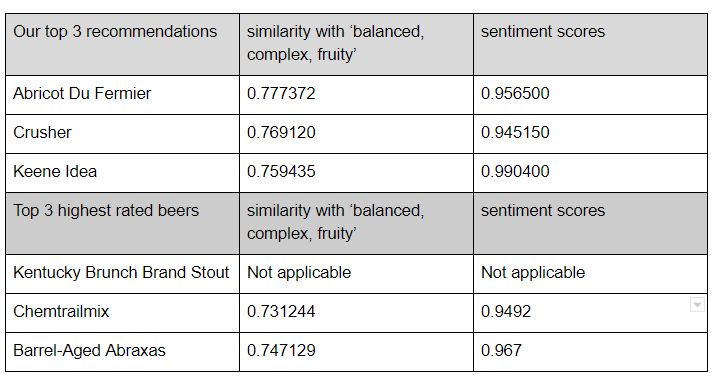

In [21]:
from IPython.display import Image
Image("Table.png")